# Schülerpraktikum - Random Walk (RW) und Diffusion limited aggregation (DLA)

## Theoretische Grundlagen

### Einführung

Im Jahre 1827 machte der Botaniker Robert Brown eine interessante Entdeckung unter dem Mikroskop. Er sah, dass sich kleinste Teilchen in seinen Proben unregelmäßig, gar zufällig bewegten. Dieses Phänomen konnte mittels Wärmebewegung bzw. einfacher Stöße zwischen diesen Objekten erklärt werden.
Später konnten viele natürliche Beobachtungen (Struktur von Schneeflocken, Fellzeichnung von Zebra /Tiger, Ausfallreaktion von CUSO$_4$) dadurch erklärt und simuliert werden.

Die Idee solcher Bewegungen wird auch heutzutage noch genutzt, um Modelle zu beschreiben, bei denen die Diffusion die treibende Kraft für den Transport ist.

Um nun zu verstehen, wie so etwas simuliert werden kann, schauen wir uns die Idee hinter dem sogenannten "Brownschen Baum" an :

**Annahme**<br>
* Wir betrachten Teilchen auf einem Quadratgitter in $2d$.
* Jeder Punkt auf diesem Quadratgitter wird über 2 ganze Zahlen beschrieben $(x,y)$.
* Ein Teilchen befindet sich in der Mitte des Gitters am Anfang der Simulation.

**Zufallsbewegung**<br>
* Ein weiteres (mobiles) Teilchen startet nun irgendwo auf dem Gitter und beginnt sich zufällig in einer der 4 Raumrichtugnen zu bewegen. 
* Es bewegt sich solange, bis:<br>
        a) Es auf eines der stationären (festen) Teilchen trifft und es Teil der Konstruktion wird.<br>
        b) Es zu weit von den stationären Teilchen entfernt ist und gelöscht wird.
* Ist eines der beiden Fälle eingetreten, wird ein neues Teilchen losgeschickt, bis der Baum die gewünschte Größe erreicht hat.

Bevor wir aber direkt mit dem Simulieren beginnen, folgen zunächst ein paar Grundlagen von Python

## Mini Grundlagen Python

### Eingabe, Ausgabe, Variaben und Datentypen

Der Computer merkt sich Sachen durch Variablen. Ein gefällter Baum oder ein errichtetes Gebäude in einem Videospiel eurer Wahl wird sich beim Speichern durch Verändern gewisser Variablen im Quellcode gemerkt. Diese Variablen werden dann beim Laden des Spielstandes wieder ausgelesen, sodass ihr euren Fortschritt nicht verliert. In Python wird dies durch:<br>
(Variablenname) = (Variablenwert)   // Bsp.: a = 3
gemacht

Ausgaben werden in Python mittels dem "print"-Befehl der Konsole übergeben. Wichtig ist dabei wie in allen Programmiersprachen die Syntax (Rechtschreibung). So muss das Ausgegebene immer in Klammern direkt nach dem Befehl folgen:<br>
Bsp.: print(3) <br>
Sollen mehrere Sachen geprinted werden können entweder mehrere Printbefehle genutz werden, oder ein "," zwischen den einzelnen Termen verwendet werden. 

Datentypen spielen in allen Programmiersprachen eine wichtige Rolle. Sie entscheiden, welche Aktionen mit den vorher definierten Variablen durchgeführt werden können oder aber wie diese Aktionen durchgeführt werden. Wir unterscheiden dabei: <br>

Ganzzahlen (integer): a = 3 oder a = 4<br>
Kommazahlen (float) : a = 3.0 oder a = 3.5 <br>
Zeichenketten (string): a = "3" oder a = "hello world"<br>
Wahrheitswerte (boolean):  a = True oder a = False <br>
Listen (lists): a = [3] oder a = [3, 4, 5, 3.5]

Frage: Woran erkennt Python, welcher Datentyp die Variable a in den jeweiligen Beispielen ist? Was sind die entscheidenden Merkmale beim Festlegen der Variable, welche der Programmierer berücksichtigen muss?

Anmerkung: Wichtig ist hier, dass bei der Kommazahl der Punkt "."  statt dem (intuitiveren) Komma ","  verwendet wird! Das Mathematische Komma wie in Kommazahlen wird mit einem Punnkt gekennzeichnet, da das klassische Komma "," schon für Operationen wie das Auflisten von Werten in Listen oder ähnlichem vorgesehen ist. (siehe letzter Eintrag der zweiten Liste)

Die Beachtung des Datentypus ist wichtig, da Programmiersprachen in der Regel bestimmte Anweisung für Datentypen unterschiedlich definiert haben. mittels type(a) kann der Typ einer Variable bestimmt werden, sollte es einmal nötig sein.

**Übungsaufgabe**<br>
Übernehmen sie folgende Zeilen:

a = 3 <br>
b = 4 <br>

print("a ist ein:", type(a)) <br>
print("b ist ein:", type(b)) <br>
print("a + b ist:", a+b) <br>

Lassen sie a und b nun Ganzzahl, Kommazahl, Zeichenkette und Liste sein. Wie ist die Operation "+" nun für die einzelnen Datentypen definiert? 

Wie vielleicht schon aus der vorigen Aufgabe ersichtlich, sind auch klassische Rechenoperationen in Python implementiert: <br>

addieren : "$+$"<br>
subtrahieren: "$-$"<br>
multiplizieren: "$*$"<br>
division: "$/$" <br>
ganzzahldivision: "$//$" <br>
exponenzieren: "$**$" <br>
restausgabe: "%"<br>

Beachte, dass auch der Computer Punktrechnung vor Strichrechnung kennt. Bestimmte Operationen werden also immer anderen vorgezogen. Eine Auflistung der Prioritäten kann im Internet gefunden werden. Durch Klammern kann der Nutzer eigene Prioritäten erstellen, was gleich nützlich sein wird.

**Übungsaufgabe:** <br>
Berechne die folgenden vier Aufaben und gebe Sie aus. Achten sie dabei auf die Prioritäten der Rechenoperationen und setzen sie wenn nötig Klammern! <br>
1. $a=285+127$
2. $b=\frac{285-127}{285}$  (Bitte einmal normale - und einmal Ganzzahldivision verwenden)
3. $c=a^{2*b}$
4. $d = c^{1/3}$

Ergebnisse:
1. 412
2. normale Division: 0.55438    Ganzzahldivision: 0
3. normale Division: 94103,69  Ganzzahldivision: 1 
4. normale Division: 45.48507  Ganzzahldivision: 1,0

Eine der wichtigsten Datentypen ist die Liste. Sie hat einen besonderen Umgang sowie viele besondere und sehr hilfreiche Operationen. Wie vorher schon gesehen, werden Listen durch eckige Klammern definiert und die einzelnen Eintrage werden durch Kommas abgetrennt. Die wichtigsten Operationen sind dabei an folgendem Beispiel gezeigt: <br>

a = [1,2,3,4,5,6]<br>

a[3] gibt den vierten Eintrag der Liste aus ($*$) <br>
len(a)  gibt die Anzahl der Einträge aus<br>
a.append(7)  append hängt einen Eintrag hinten an die Liste an<br>
a.index (3)  gibt den Index einens bestimmten Wertes aus<br>
a.clear()  löscht alle Einträge einer Liste<br>

($*$) Achtung: Der erste Eintrag einer Liste hat in Python den Index 0 und dannach wird aufsteigend mit ganzen Zahlen gezählt. <br>

**Übungaufgabe:** <br>
1. Speichere eine Liste mit allen Wochentagen, gebe die Länge der Liste und das 3. Element aus. <br>
2. Teste aus, was passiert, wenn man die Wochentagsliste mit 3 multipliziert.

Soll der Nutzer nach einer Eingabe gefragt werden, kann dies mit dem "input"-Befehl realisiert werden. Dabei sollte der Programmierer berücksichtigen, welchen Variablentyp er vom Nutzer eingegeben haben möche. Bsp: <br>

a = int(input()) <br>
b = str(input("Hier kann auch text stehen, der dem Nutzer vor der Eingabe angezeigt wird"))

Wird das Programm gestartet, erscheint ein schwarzes Quadrat, in welchem de Nutzer seine Eingabe tätigen und mit "Enter" bestätigen kann.

In [1]:
# Folgender Code soll die Zahl, welcher der Nutzer eingegeben hat um 3 erhöhen. Hierbei sind 4 Fehler enthalten. Führen Sie den Code aus und schauen
# sich die verschiedenen Fehlermeldungen einmal an.

eingabe = str(input()
pritn[eingabe + 3]


SyntaxError: invalid syntax (3821727924.py, line 5)

### Programmsteuerungselemente



Soll ein Computer entscheidungen treffen, so sogenannte **Statements** dafür genutzt. Dafür werden folgende Operatoren oft verwendet: <br>

$<$  : kleiner als <br>
$>$  : größer als <br>
$<=$: kleiner gleich <br>
$>=$: größer gleich <br>
$==$: ist gleich (doppeltes =, da das einfache schon für die Definition von Variablen genutzt wird) <br>
$!=$: ist ungleich <br>

Um nun die Syntax genauer zu verstehen, soll folgender Code helfen, welcher herausfindet, ob eine Zahl größer, kleiner oder gleich 5 ist.

In [ ]:
a = int(input("Gebe eine ganze Zahl ein: "))

if a > 5:
    print("Die Zahl ist größer als 5")
elif a < 5:
    print("Die Zahl ist kleiner als 5")
else:
    print("Die Zahl ist gleich 5")


Außerdem helfen Logikoperatoren komplexere Aussagen zu verknüpfen.  <br>

"$and$" : beide Aussagen müssen Stimmen <br>
"$or$" : eine der beiden Aussagen muss stimmen <br>

Als Beispiel soll folgender Code überprüfen, ob eine Zahl zwischen 5 und 8 ist

In [1]:
a = int(input("Gebe eine Zahl ein: "))

if a <= 5:
    print("Die Zahl ist kleiner als 5")
elif a > 5 and a < 8:
    print("Die Zahl liegt zwischen 5 und 8")
else:
    print("Die Zahl ist größer als 8")

Gebe eine Zahl ein: 7
Die Zahl liegt zwischen 5 und 8


**Übungaufgabe:** <br>
Der Nutzer soll  $p,q$  einer quadratischen Gleichung $ x^2 + p x + q = 0$ eingeben. <br>
Es soll dann die Lösungsmenge (Nullstellen) $x_{1,2}$ ohne Fehlermeldung ausgeben werden. Wenn es sich um eine leere Lösungsmenge handelt, soll eine leere Liste zurück gegeben werden. In den anderen beiden Fällen, soll eine Liste mit einem oder zwei Werten zurück gegeben werden. <br>

1. Hinweis: Zur Bestimmung der Nullstellen soll die pq-Formel verwendet werden : $x_{1,2} = -\dfrac{p}{2} \pm \sqrt{\left( \dfrac{p}{2}\right)^2-q}$ <br>

2. Hinweis: Zur Bestimmung, wie viele Nullstellen die Gleichung hatt, kann die Diskreminante verwendet werden: $D = \left( \dfrac{p}{2}\right)^2-q$ <br>
    Es gilt dabei :  
    wenn D > 0: zwei Lösungen <br>
    wenn D = 0: eine Lösung <br>
    wenn D < 0: keine Lösung <br>

Soll der Computer bestimmte Abschnitte des Codes wiederholen, werden **Schleifen** genutzt. Grundsätzlich gibt es in Python 2 Arten von Schleifen. Einmal die for-Schleife und die while-Schleife. In folgendem Beispielcode sollen beide Schleifen einmal alle Wochentage aus einer Liste printen: 

In [13]:
tag = ["Mo","Di", "Mi", "Do", "Fr", "Sa", "So"]

# WHILE-SCHLEIFE:

i = 0 # Zunächst muss ein Durchlaufparameter initialisiert werden
while i <= len(tag)-1: #Bedingung der Schleife, sollte Durchlaufparameter enthalten
    print(tag[i]) #Printe den Eintrag der Liste
    i += 1 # Durchlaufparameter wird um 1 erhöht
    
for k in range(0, len(tag)): # Welche Werte soll k annehmen
    print(tag[k]) # Printen der Einträge der Liste
    
#Außerdem kann die while-true-Schleife manchmal nützlich sein:
i = 0 # initialisieren des Durchlaufparameters
while True: # da true immer true ist, geht diese Schleife unendlich lang
    print(tag[i]) # Printen der Einträge der Liste
    i += 1 # Erhöhen des Durchlaufparameters
    if i > len(tag)-1: # Bedingung, wann die Schleife abgebrochen werden soll
        break # "break" bricht die Schleife ab

Mo
Di
Mi
Do
Fr
Sa
So
Mo
Di
Mi
Do
Fr
Sa
So
Mo
Di
Mi
Do
Fr
Sa
So


Es ist hoffentlich ersichtlich, dass der Durchlaufparameter bedacht sein muss, damit die gewollte Anzahl an Schritten durchgeführt wird. Um dies nun zu Üben, soll folgende Aufgabe helfen. <br>

**Übungsaufgabe**<br>
Es sollen alle ganzen Zahlen von 0 bis 100 aufsummiert werden.  Dies soll einmal mit einer for- und einmal mit einer while-Schleife realisiert werden. Das Ergebnis soll dann ausgegeben werden. Geben sie zusätzlich jede Zahl zwischen 0 und 100 in einer Liste aus.

Hinweis: Das richtige Ergebnis lautet 5050

**Zusatzaufgaben** <br>
Summieren sie alle Zahlen von 2 bis 10 <br> 
Summieren sie alle geraden Zahlen von 1 bis 100 <br>

Sollen nun bestimmte Aufgaben vom Programm mit abgewandelten Parametern mehrmals durchgeführt werden, können **Funktionen** genutzt werden. Diese sind in folgenden Beispielen genauer erläutert

In [16]:
# Funktionskopf: def <Name>(<Übergabeparameter - beliebig viele>):
def f(x):
    # Funktionskörper (einrücken, beliebig viele Zeilen, was soll die Funktion tun?)
    res = 4+3*x-2*x*x
    # Welche Werte sollen zurück gegeben werden?
    return res

# Wichtig: Dies ist "nur" die Definition. Die Funktion wird hier noch nicht ausgeführt, das übernimmt folgender Funktionsaufruf:

#Funktionsaufruf/Funktionsausführung
print(f(3)) 
# -> Funktion wird ausgeführt mit x=3, Ergebnis wird ausgegeben und vergessen
res = f(-5)
print(res)
# -> Funktion wird ausgeführt mit x=5, Ergebnis wird gespeicht und kann weiter verwendet
#    werden

-5
-61


In [18]:
def halleluja(text, zahl, boolWert):
    if boolWert == True:
        print("1.", text, zahl)
    elif text == "hihi":
        print("2.", zahl, boolWert)
    else :
        print("3.", text,zahl, boolWert)
# Wenn man keine Infos zurückgeben will, kann das return weggelassen werden

In [17]:
halleluja("hihi", 3.47, True)
halleluja("hihi", 3.47, False)
halleluja("hihi", 4, True)
halleluja("hihi", 4, False)
halleluja("haha", 3.47, True)
halleluja("haha", 3.47, False)
halleluja("haha", 4, True)
halleluja("haha", 4, False)
# -> Überlege warum die Ausgaben kommen, die kommen. :)

1. hihi 3.47
2. 3.47 False
1. hihi 4
2. 4 False
1. haha 3.47
3. haha 3.47 False
1. haha 4
3. haha 4 False


**Übungsaufgabe**

Es soll eine Funktion geschrieben werden, bei welcher der Nutzer seine Körpergröße und sein Gewicht eingibt. Die Funktion soll den Body-Mass-Idex (BMI) bestimmen und ihn in einer Skala einordnen. Beide Ergebnisse sollen dem Nutzer ausgegeben werden.<br>

Die Formel für den Body-Mass-Index lautet: $ BMI = \dfrac{ Gewicht \, in \, kg }{(Körpergröße \, in \, m)^2}$  <br>
Skala: <br>
 $<= 16$: starkes Untergewicht<br>
 $16 - 17$: mäßiges Untergewicht<br>
 $17 - 18,5$: leichtes Untergewicht<br>
 $18,5 - 25$: Normalgewicht<br>
 $25 -30$: Übergewicht<br>
 $>= 30$: Adipositas<br>

 Muss man "das Fahrrad immer neu erfinden"? Nein. Für viele Probleme gibt es bereits Programme und Funktionen, die mit Hilfe von **Bibliotheken** eingebunden und aufgerufen werden können. <br>
Für dieses Projekt von Relevanz: <br>
* Mathematische Funktionen via *numpy*
* Zufallszahlen via *random*
* Bilder erstellen via *matplotlib* <br>

**Übungsaufgabe**
Bestimmen sie, ob bei der Aufsummation der Zahlen von 0 bis 100 die for- oder die while-Schleife schneller ist. <br>

Dafür kann der Befehl time.time() genutzt werden. Wichtig ist dabei, dass am Anfang des Programms die Bibiothek time importiert werden muss. Fügen sie zur Übung folgende Befehle in ihr obiges Programm ein:<br>

import time <br>

start1 = time.time() <br>

Hier soll nun eine der beiden Schleifen stehen <br>

end1 = time.time() <br>
print(end1 - start1) <br>

start2 = time.time() <br>

Hier soll nun die andere Schleife stehen <br>

end2 = time.time() <br>
print(end2 - start2)<br>

Es folgen nun weitere Beispiele für andere Bibliotheken

In [2]:
import numpy as np # Einbinden der Bibliothek und verwenden einer Abkürzung
print(np.sin(np.pi/2.)) # Aufrufen von Funktionen aus der Bibliothek über die Abkürzung
print(np.log(1.1))
print(np.sqrt(9))

1.0
0.09531017980432493
3.0


In [5]:
import random # Einbinden der Bibliothek
print(random.random()) # Erzeugt eine Komma-Zufallszahl zwischen [0.,1.], jede Zahl gleich wahrscheinlich
print(random.randint(4,10)) # Erzeugt eine ganze Zufallszahl zwischen [min,max], jede Zahl gleich wahrscheinlich


0.8644192114471942
10


**Übungsaufgabe** <br>

Schreiben sie eine Funktion, welche einen klassischen Spielwürfel simuliert. Der Nutzer soll dabei die Anzahl der Würfe selbst festlegen können. In welcher Form das Ergebnis ausgegeben wird, kann selbst entschieden werden. Es empfiehlt sich aber, die Zahlen in einer Liste auszugeben, um diese für eine spätere Aufgabe graphisch dazustellen!

Eine weitere, sehr nützliche Bibliothek, ist Matplotlib. Sie kann genutzt werden, um Zahlenwerte in Form von Diagrammen graphisch dazustellen. Folgende zwei Beispielcodes zeigen, wie dies realisiert werden kann. Übrigens, durchs rechtsklicken auf eine Abbildung kann diese gespeichert werden. 

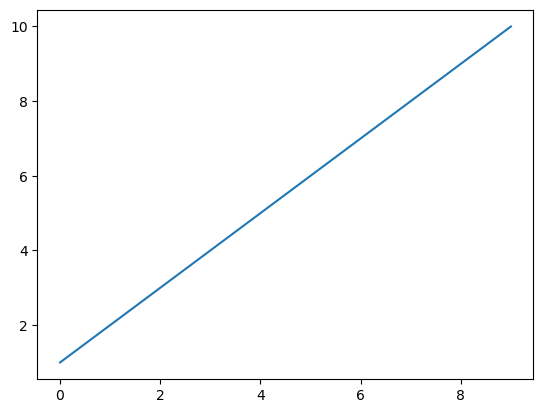

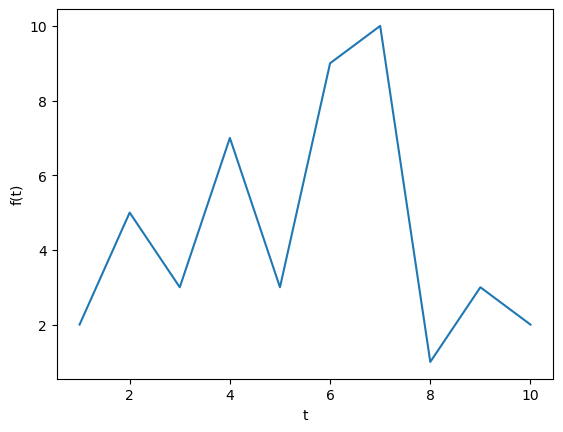

In [16]:
# hat man eine Liste, reicht folgender Code
import matplotlib.pyplot as plt

x_list = [1,2,3,4,5,6,7,8,9,10]
 
plt.plot(x_list)                       # plotte Daten
ax.set_xlabel('t')                   # Beschriftung der x-Achse
ax.set_ylabel('f(t)')               # Beschriftung der y-Achse

plt.show()


# hat man 2 Listen, kann folgender Code kopiert werden

x_list = [1,2,3,4,5,6,7,8,9,10]
y_list = [2,5,3,7,3,9,10,1,3,2]
 
plt.plot(x_list, y_list)           # plotte Daten
plt.xlabel('t')                          # Beschriftung der x-Achse
plt.ylabel('f(t)')                      # Beschriftung der y-Achse

plt.show()

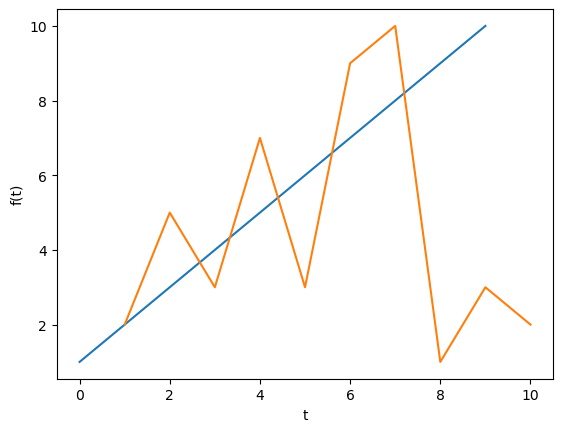

In [15]:
#es können auch mehrere Kurven in einem Bild dargestellt werden

import matplotlib.pyplot as plt

x_list = [1,2,3,4,5,6,7,8,9,10]
 
plt.plot(x_list)            # plotte Daten

x_list = [1,2,3,4,5,6,7,8,9,10]
y_list = [2,5,3,7,3,9,10,1,3,2]
 
plt.plot(x_list, y_list)            # plotte Daten
plt.xlabel('t')                           # Beschriftung der x-Achse
plt.ylabel('f(t)')                       # Beschriftung der y-Achse
plt.show()

**Übungsaufgabe** <br>

Lassen Sie sich die Würfe ihrer Funktion für 10 Würfe graphisch mittels matplotlib darstellen. Die Augenzahl soll dabei in Abhängikeit von der Nummer des Wurfes dargestellt sein.

Zusatz: Informiere dich im Internet, wie du keine Linie sondern die Würfe als einzelne Punkte plotten kannst.

## DLA-Projekt $\rightarrow$ Startprojekt 'Zufallswanderer' (1D)

**Startaufgabe:** <br>
Simuliere einen zufällig wanderendes Teilchen auf einem Liniengitter mit Abstand 1 
zwischen zwei benachbarten Gitterpunkten. 
Das Teilchen beginnt bei $x=0$. 
Das Teilchen kann zufällig nach links oder rechts springen ($\pm 1$).
Speichere die Position für jeden Zeitschritt.

*Fragen:* 
* Wie könnte man die Position über Zeit sinnvoll speichern?
* Wie kann man die zufällige Richtungsänderung simulieren?
* Was passiert, wenn du die Simulation mehrfach hintereinander startest?

Lasse das Teilchen nun auf einem Quadratgitter laufen mit Startpunkt bei $(0,0)$.

Überlege, wie man den Weg eines Teilchen graphisch darstellen könnte. <br>

Wie kann man mehrere Teilchen losschicken und ihre Bewegung in einer Graphik zusammen anzeigen?